An exploration of the California Housing Census data from https://www.kaggle.com/datasets/camnugent/california-housing-prices. Numerical regression of median house values

# Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
housing = pd.read_csv('housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Exploration

## Features

Ocean proximity is categorical and has 5 distinct values:

In [13]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Location data is also ditributed according to california population density. Clustering and including cluster proximity could be relevant:

/Users/jasonli/anaconda3/envs/workhorse/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

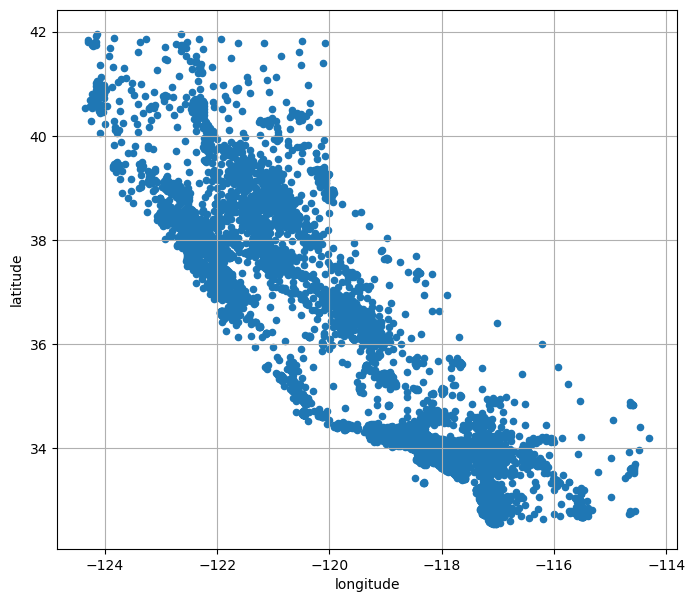

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, colormap="jet", figsize=(8,7))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

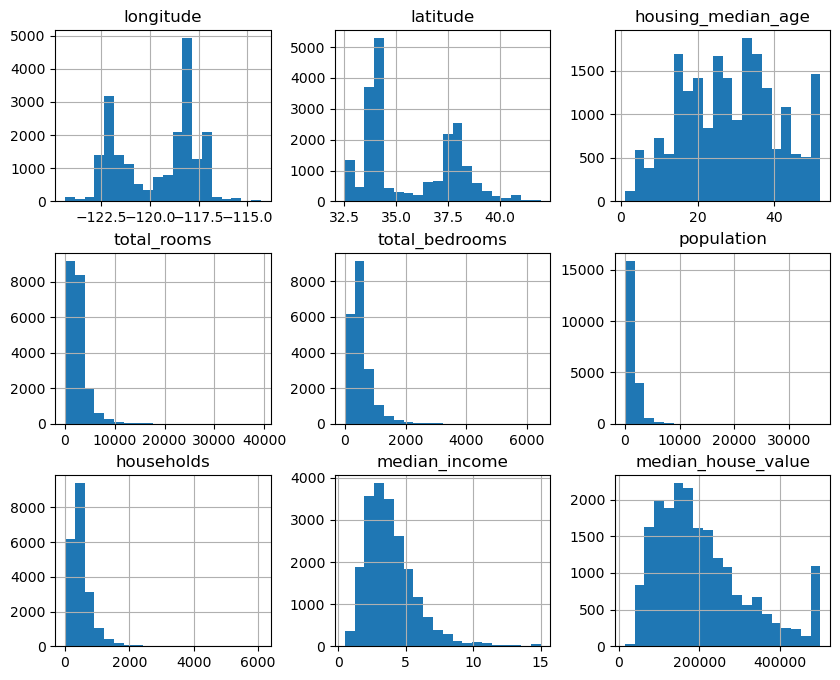

In [15]:
housing.hist(bins=20, figsize=(10,8))

total_bedrooms also has null values present - use an imputer to replace the null values:

In [16]:
housing["total_bedrooms"].isnull().sum()

207

## Train Test Split

The target feature (median_house_value) is not evenly distributed. Train and test sets have to be stratified based on median hosue value:

<Axes: >

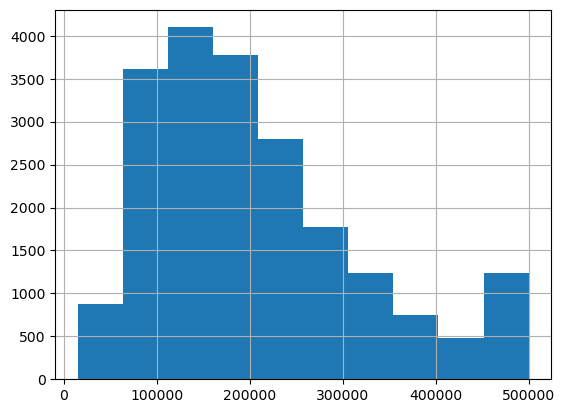

In [17]:
housing["median_house_value"].hist(bins=10)

In [18]:
# Create a new column and bin the house values into categories
housing["median_house_value_cat"] = pd.cut(housing["median_house_value"], bins=np.linspace(0, 500001, 11), labels = range(1, 11))
housing["median_house_value_cat"]

0        10
1         8
2         8
3         7
4         7
         ..
20635     2
20636     2
20637     2
20638     2
20639     2
Name: median_house_value_cat, Length: 20640, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.drop(columns=["median_house_value"]), housing[["median_house_value"]], test_size=0.2, stratify=housing[["median_house_value_cat"]])

In [20]:
#drop the added categorical column
housing = housing.drop(columns="median_house_value_cat")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Preprocessing

In [24]:
cat_attributes = ["ocean_proximity"]
num_attributes = housing.columns.drop(cat_attributes)
num_attributes

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [31]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterDistance(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters, gamma=1.0):
        self.n_clusters = n_clusters
        self.gamma = gamma

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names(self):
        return [f"Cluster {i} dist" for i in range(self.n_clusters)]

In [37]:
cls_sim = ClusterDistance(n_clusters=10)
sims = cls_sim.fit_transform(X_train[["latitude", "longitude"]], sample_weight=y_train.values.reshape(-1))
sims

/Users/jasonli/anaconda3/envs/workhorse/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[8.78897825e-07, 9.08428059e-01, 1.76112543e-15, ...,
        7.82033656e-13, 2.17026192e-04, 1.70936761e-01],
       [8.99558812e-05, 1.42759461e-01, 3.91856530e-11, ...,
        4.12321791e-09, 5.48512570e-02, 9.65102144e-01],
       [8.91606278e-03, 1.42063992e-16, 9.78142889e-01, ...,
        7.45842945e-01, 1.59541259e-05, 5.98599014e-12],
       ...,
       [2.55013241e-09, 7.93983681e-01, 5.54738490e-19, ...,
        4.25481899e-16, 9.25709294e-06, 7.52455048e-02],
       [3.84983414e-25, 3.31928669e-07, 1.04949094e-37, ...,
        3.88155373e-34, 4.54842101e-16, 1.31392794e-08],
       [4.20423055e-16, 3.95358470e-05, 1.58025311e-24, ...,
        4.90044242e-22, 2.48628548e-08, 2.71036984e-04]])

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Categorical and Numerical Attributes
cat_attributes = ["ocean_proximity"]
num_attributes = housing.columns.drop(cat_attributes)

#Categorical and Numerical Pipelines
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [8]:
imputer = SimpleImputer(strategy="median")
test = pd.DataFrame([[0, 0], [0, np.nan], [1, 1], [1, 1]])
imputer.fit(test)
imputer.transform(test)

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.]])

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(X[["Longitude", "Latitude"]].values)

/Users/jasonli/anaconda3/envs/workhorse/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


plt.plot(kmeans.cluster_centers_[:, 0],
         kmeans.cluster_centers_[:, 1],
         linestyle="", color="black", marker=".", markersize=20,
         label="Cluster centers")